![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)
# <font color='Green'>Dicas e Truques de Ciência de Dados</font>



![](https://cienciadosdados.com/images/2021/Thumbs/Design_sem_nome_61.png)

![](https://miro.medium.com/max/850/1*tNq0zW90xIQXYmftKmXhuw.png)

#Oficial
https://pycaret.org/create-model/

#Github
https://github.com/pycaret/pycaret/tree/master/examples

#Índice

1. O que é PyCaret e por que você deve usá-lo?

2. Como criar nosso modelo de aprendizado de máquina usando 
PyCaret 

3. Construindo modelos de conjunto usando PyCaret

4. Vamos analisar nosso modelo!

5. É hora de fazer novas previsões

6. Salvar e carregar o modelo


**Por que vc deve usá-lo**

- Torna você mais produtivo.
- Você pode gastar menos tempo codificando e pode fazer mais experimentos
- É uma biblioteca de aprendizado de máquina fácil de usar que o ajudará a realizar experimentos completos na construção de Máquinas Preditivas, aprendizado de máquina, seja atribuindo valores ausentes, codificando dados categóricos, engenharia de recursos, ajuste de hiperparâmetros ou criando modelos de conjunto (quer mais? rsrsrs).

##Problema de Negócio

Temos um conjunto de dados bancários com características como idade do cliente, experiência, renda, escolaridade e se ele possui cartão de crédito ou não.

O banco quer construir uma máquina preditiva com aprendizado de máquina que os ajudará a identificar os **clientes em potencial com maior probabilidade de adquirir um empréstimo pessoal.**

**Instalando PyCaret em sua máquina**

In [4]:
!pip3 install pycaret

     |████████████████████████████████| 264 kB 7.7 MB/s 
     |████████████████████████████████| 167 kB 48.7 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 248 kB 49.6 MB/s 
     |████████████████████████████████| 271 kB 39.2 MB/s 
     |████████████████████████████████| 1.7 MB 45.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 53.3 MB/s 
     |████████████████████████████████| 2.0 MB 21.5 MB/s 
     |████████████████████████████████| 14.4 MB 56 kB/s 
     |████████████████████████████████| 108 kB 61.6 MB/s 
     |████████████████████████████████| 1.3 MB 39.9 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 636 kB 48.7 MB/s 
     |████████████████████████████████| 102 kB 54.3 MB/s 
     |███████████████████

**Instalando a Biblioteca de Interpretabilidade do Modelo**

In [ ]:
!pip install shap

In [ ]:
# importing pandas to read the CSV file
import pandas as pd
# read the data
data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_train_data.csv')
# view the top rows of the data
data_classification.head()

In [7]:
data_classification.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0  3510   38          12      61     91330       3    0.9          3   
1  1129   30           5     171     94025       2    1.9          2   
2  1637   65          39     100     92122       4    1.7          3   
3  3165   28           4      82     95136       4    0.0          1   
4  3563   32           8     169     94596       1    6.5          3   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   0           0       0           0  
1         0              1                   0           0       0           0  
2         0              0                   0           0       0           1  
3         0              0                   0           0       1           1  
4       272              1                   1           1       1           0

In [5]:
# Verificando a Versão do Pycaret
from pycaret.utils import version
version()

'2.3.3'

**Importando um Módulo:**

 Dependendo do tipo de problema que você vai resolver, primeiro você precisa importar o módulo. Na primeira versão do PyCaret, 6 módulos diferentes estão disponíveis - regressão, classificação, clustering, processamento de linguagem natural (PNL), detecção de anomalias e regra de mineração associada. Neste artigo, vamos resolver um problema de classificação e, portanto, vamos importar o módulo de classificação

**Inicializando a configuração :**

 O PyCaret executa algumas tarefas básicas de pré-processamento, como ignorar os IDs e as colunas de data, imputar os valores ausentes, codificar as variáveis ​​categóricas e dividir o conjunto de dados na divisão de teste e treino para o restante das etapas de modelagem . Quando você executa a função de configuração, ela primeiro confirma os tipos de dados e, em seguida, se você pressionar enter, criará o ambiente para você prosseguir

In [6]:
from pycaret import classification

In [8]:
classification_setup = classification.setup(data= data_classification, target='Personal Loan')

Description             Value
0                               session_id              7461
1                                   Target     Personal Loan
2                              Target Type            Binary
3                            Label Encoded        0: 0, 1: 1
4                            Original Data        (4000, 14)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 6
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set        (2799, 18)
12                    Transformed Test Set        (1201, 18)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              5044
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

**Treinando um modelo**  

Treinar um modelo no PyCaret é bastante simples. Você só precisa usar a função **create_model** que leva apenas um parâmetro - a abreviação do modelo como uma string. 

Aqui, vamos primeiro treinar um modelo de árvore de decisão para o qual temos que passar **“ dt ”** e ele retornará uma tabela com pontuações de **validação cruzada k-fold** de métricas de avaliação comuns usadas para modelos de classificação.

Aqui está um lembrete rápido das **métricas de avaliação** usadas para aprendizagem supervisionada:

**Classificação**: precisão, AUC, recall, precisão, F1, Kappa
**Regressão**:  MAE, MSE, RMSE, R2, RMSLE, MAPE

In [9]:
# Criando o Modelo (Máquina Preditiva)
classification_dt = classification.create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9929  0.9788  0.9615  0.9615  0.9615  0.9576  0.9576
1       0.9750  0.9172  0.8462  0.8800  0.8627  0.8490  0.8492
2       0.9821  0.9556  0.9231  0.8889  0.9057  0.8958  0.8960
3       0.9607  0.8230  0.6538  0.8947  0.7556  0.7348  0.7455
4       0.9929  0.9788  0.9615  0.9615  0.9615  0.9576  0.9576
5       0.9643  0.9113  0.8462  0.7857  0.8148  0.7951  0.7958
6       0.9750  0.9517  0.9231  0.8276  0.8727  0.8589  0.8605
7       0.9857  0.9576  0.9231  0.9231  0.9231  0.9152  0.9152
8       0.9750  0.8999  0.8077  0.9130  0.8571  0.8435  0.8454
9       0.9749  0.9862  1.0000  0.7879  0.8814  0.8675  0.8753
Mean    0.9778  0.9360  0.8846  0.8824  0.8796  0.8675  0.8698
SD      0.0102  0.0472  0.0958  0.0605  0.0603  0.0657  0.0634

In [10]:
# Criando Agrupamentos Boosting 
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9893  0.9768  0.9615  0.9259  0.9434  0.9375  0.9377
1       0.9750  0.9172  0.8462  0.8800  0.8627  0.8490  0.8492
2       0.9857  0.9576  0.9231  0.9231  0.9231  0.9152  0.9152
3       0.9643  0.8250  0.6538  0.9444  0.7727  0.7540  0.7691
4       0.9857  0.9749  0.9615  0.8929  0.9259  0.9180  0.9188
5       0.9643  0.9285  0.8846  0.7667  0.8214  0.8017  0.8042
6       0.9821  0.9729  0.9615  0.8621  0.9091  0.8992  0.9009
7       0.9857  0.9576  0.9231  0.9231  0.9231  0.9152  0.9152
8       0.9750  0.8826  0.7692  0.9524  0.8511  0.8376  0.8433
9       0.9821  0.9901  1.0000  0.8387  0.9123  0.9024  0.9067
Mean    0.9789  0.9383  0.8885  0.8909  0.8845  0.8730  0.8760
SD      0.0085  0.0489  0.1010  0.0539  0.0525  0.0569  0.0535

In [11]:
# OLha o TESOURO: Comparando diversas Máquinas Preditivas
classification.compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.9853  0.9971  0.8885  0.9543   
lightgbm  Light Gradient Boosting Machine    0.9846  0.9970  0.8808  0.9553   
rf               Random Forest Classifier    0.9832  0.9972  0.8385  0.9791   
et                 Extra Trees Classifier    0.9789  0.9894  0.7962  0.9727   
dt               Decision Tree Classifier    0.9778  0.9360  0.8846  0.8824   
ada                  Ada Boost Classifier    0.9636  0.9795  0.7308  0.8669   
lda          Linear Discriminant Analysis    0.9468  0.9616  0.6231  0.7726   
ridge                    Ridge Classifier    0.9407  0.0000  0.3885  0.9313   
lr                    Logistic Regression    0.9253  0.9351  0.4154  0.6466   
svm                   SVM - Linear Kernel    0.9068  0.0000  0.0038  0.0333   
knn                K Neighbors Classifier    0.9050  0.6099  0.0154  0.3500   
nb                            Naive Bayes    0.9003  0.9355  0.6077  0.4719   
qda       Quadratic Discriminant Analysis    0.5974  0.5088  0.4000  0.0915   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.9176  0.9096  0.9118     0.398  
lightgbm  0.9124  0.9041  0.9073     0.153  
rf        0.9005  0.8915  0.8963     0.609  
et        0.8720  0.8608  0.8679     0.515  
dt        0.8796  0.8675  0.8698     0.021  
ada       0.7871  0.7675  0.7741     0.182  
lda       0.6817  0.6534  0.6621     0.023  
ridge     0.5426  0.5174  0.5768     0.017  
lr        0.4953  0.4584  0.4766     0.066  
svm       0.0069  0.0051  0.0086     0.033  
knn       0.0294  0.0202  0.0566     0.126  
nb        0.5276  0.4731  0.4801     0.019  
qda       0.1451  0.0130  0.0125     0.024

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7461, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

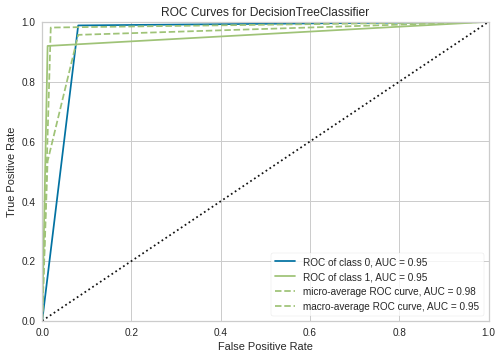

In [12]:
# Gráfico AUC-ROC 
classification.plot_model(classification_dt, plot = 'auc')

In [ ]:
# Curva Precision Recall
classification.plot_model(classification_dt, plot = 'pr')

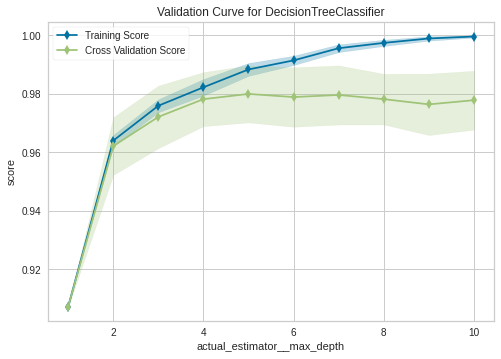

In [14]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

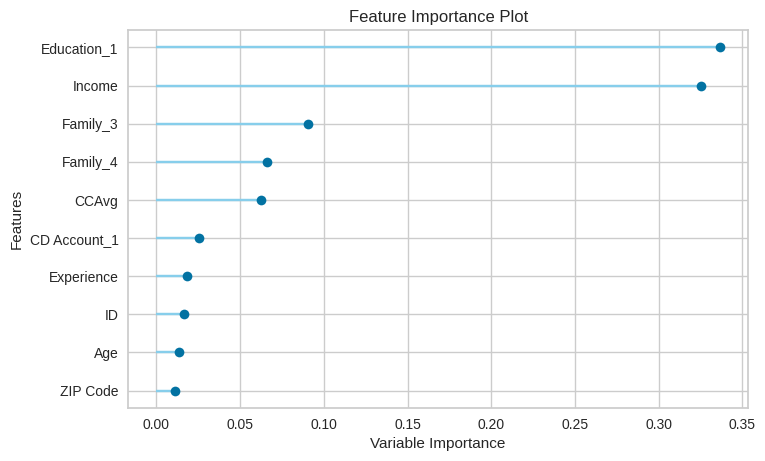

In [15]:
# Importância das Variáveis
classification.plot_model(classification_dt, plot = 'feature')

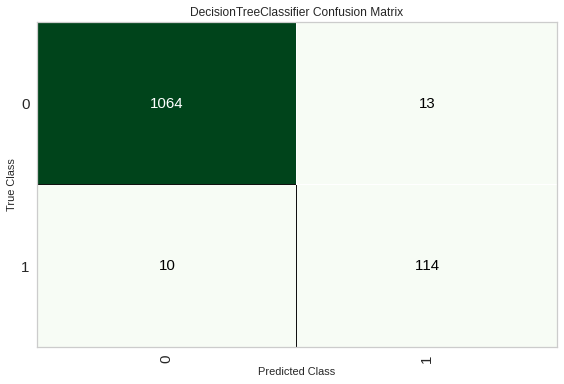

In [16]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

In [17]:
# Avaliação das Máquinas Preditivas
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpretabilidade dos Modelos (das Máquinas Preditivas)

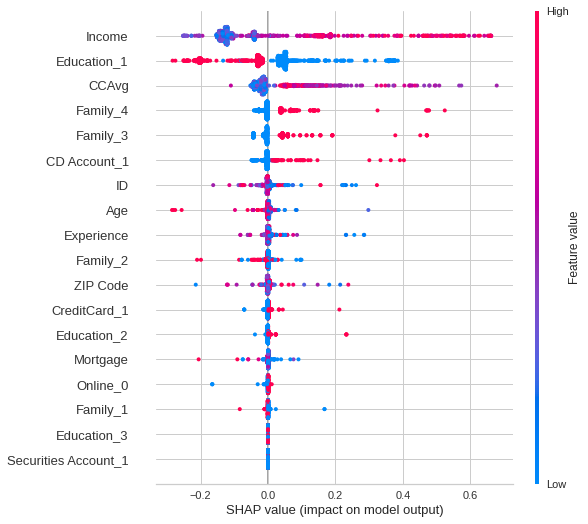

In [18]:
# Usando a Biblioteca SHAP
classification.interpret_model(classification_dt)

In [19]:
# Dados de Teste
test_data_classification = pd.read_csv('https://raw.githubusercontent.com/lakshay-arora/PyCaret-Example/master/datasets/loan_test_data.csv')

In [20]:
# Fazendo novas previsões
predictions = classification.predict_model(classification_dt, data=test_data_classification)

In [ ]:
# Imprimindo na tela as novas predições
predictions

In [ ]:
# Salvando a Máquina Preditiva Final
classification.save_model(classification_dt, 'decision_tree_1')

In [24]:
# Carregando para Usar a Máquina Preditiva Final. Aqui é onde a Aplicação, depois de Criada, vai trabalhar...
dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Successfully Loaded


A interpretabilidade continua sendo um aspecto muito importante do aprendizado de máquina e da ciência de dados à medida que modelos mais complexos são colocados em produção. **LIME e [Shapley](https://github.com/slundberg/shap/blob/master/notebooks/api_examples/explainers/Exact.ipynb)** são dois desses métodos que começaram a ter alguma adoção na indústria.

#Fim

## Valeu!

### # Onde me Encontrar - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="600" height="330" src="https://www.youtube.com/embed/qwW8AjRqPz4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Fonte:

https://www.analyticsvidhya.com/blog/2020/05/pycaret-machine-learning-model-seconds/